<a href="https://colab.research.google.com/github/qtuter1997/MachineLearning/blob/main/EvaluationMethods/evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Evalua model use accuracy scores
import numpy as np
from sklearn.metrics import accuracy_score

**Accuracy scores**

Cách đánh giá đơn giản này được tính dựa trên tỉ lệ của số điểm dự đoán đúng trên tổng số dữ liệu.
```
          (TP + TN)
Acc =  ------------------ 
      (TP + TN + FP + FN)
```

In [ ]:
# Generate data
y_true = np.array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2])
y_pred = np.array([0, 1, 0, 2, 1, 1, 0, 2, 1, 2])

# Self - Compute
def acc_score(y_tr, y_pr):
  correct = np.sum(y_tr == y_pr)
  return float(correct) / y_tr.shape[0]
# Use lib
print('seft: {} \n lib: {}'.format(acc_score(y_true, y_pred), accuracy_score(y_true, y_pred)))

seft: 0.6 
 lib: 0.6


**Confusion matrix**

**To do**

```
 Total: 10 | Predicted | Predicted | Predicted |   
           |    as: 0  |    as: 1  |    as: 2  |   
-----------|-----------|-----------|-----------|---
 True: 0   |     2     |     1     |     1     | 4 
-----------|-----------|-----------|-----------|---
 True: 1   |     1     |     2     |     0     | 3 
-----------|-----------|-----------|-----------|---
 True: 2   |     0     |     1     |     2     | 3 
-----------|-----------|-----------|-----------|---
```

In [ ]:
from sklearn.metrics import confusion_matrix

def unnormalize_cf_matrix(y_tr, y_pr):
  N = np.unique(y_tr).shape[0]
  cm = np.zeros((N,N))
  for n in range(y_tr.shape[0]):
    cm[y_tr[n],y_pr[n]] +=1
  return cm

In [ ]:
conf_matrix = unnormalize_cf_matrix(y_true, y_pred)
print(conf_matrix)
print('Accuracy: {}'.format(np.diagonal(conf_matrix).sum() / conf_matrix.sum()))

[[2. 1. 1.]
 [1. 2. 0.]
 [0. 1. 2.]]
Accuracy: 0.6


[[2. 1. 1.]        [4.
 [1. 2. 0.]   div   3.
 [0. 1. 2.]]        3.]

In [ ]:
# Normalize confusion matrix
normalize_conf_matrix = conf_matrix / conf_matrix.sum(axis = 1, keepdims= True)
normalize_conf_matrix

array([[0.5       , 0.25      , 0.25      ],
       [0.33333333, 0.66666667, 0.        ],
       [0.        , 0.33333333, 0.66666667]])

In [ ]:
# Use lib sklearn
conf_matrix_lib = confusion_matrix(y_true, y_pred)
# conf_matrix_lib = conf_matrix_lib / conf_matrix_lib.sum(axis=1, keepdims=True)
conf_matrix_lib

array([[2, 1, 1],
       [1, 2, 0],
       [0, 1, 2]])

**Visualize confusion matrix**

In [ ]:
import matplotlib.pyplot as plt
import itertools

def plot_cm(cm, classes, normalize = True, 
            title = "Confusion matrix", 
            cmap = plt.cm.Blues):
  """
  This function plots the confusion matrix.
  Normalizetion can be applied by setting 'normalize = True'.
  """
  if normalize:
    cm = cm.astype(float) / cm.sum(axis = 1, keepdims = True)
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  print(fmt)
  thresh = cm.max() / 2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.xlabel('True label')
  plt.ylabel('Predict label')

.2f


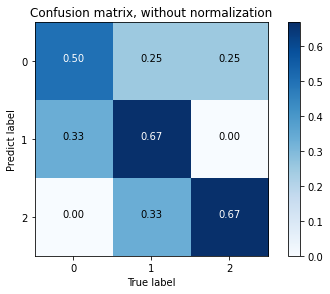

In [ ]:
# Plot non-normalized confusion matrix
class_names = [0, 1, 2]
plt.figure()
plot_cm(conf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()

Đối với các bài toán nhiều lớp dữ liệu, cách đánh giá này rất hữu ích để đánh 
giá mô hình. Các ô càng đậm càng thể hiện độ chính xác cao và điều này ngược lại đối với các ô màu nhạt. Khi đánh giá một mô hình qua Confusion matrix có tốt hay không thì dựa vào principal diagonal với các phần tử có giá trị lớn, các phần tử còn lại có giá trị nhỏ. Điều này tương ứng với việc khi biểu diển các màu sắc trên đường chéo chính sẽ đậm hơn phần còn lại (ô trên đường chéo chính có màu xanh đậm hơn), và để đánh giá chi tiết hơn ta nên normalized dữ liệu thì việc đánh giá mô hình sẽ rõ ràng hơn ở từng lớp dữ liệu









**True/Fasle Positive/Negative**
Thường áp dụng cho bài toán có 2 lớp dữ liệu. 

```
                  |      Predicted      |      Predicted      |
                  |     as Positive     |     as Negative     |
------------------|---------------------|---------------------|
 Actual: Positive | True Positive (TP)  | False Negative (FN) |
------------------|---------------------|---------------------|
 Actual: Negative | False Positive (FP) | True Negative (TN)  |
------------------|---------------------|---------------------|

```






In [ ]:
def TFPN()
  pass

**Receiver Operating Characteristic curve** & **Area Under the curve**



**To do**

In [8]:
# Visualize ROC curve with 2 classes
# Positive : 30 data points, Negative: 20 data points

# Generate data
n0, n1 = 20, 30
score0 = np.random.rand(n0) / 2
label0 = np.zeros(n0, dtype = int)
score1 = np.random.rand(n1) / 2 + .2
label1 = np.ones(n1, dtype = int)
score = np.concatenate((score0, score1))
y_true = np.concatenate((label0, label1))
print(score)
print( y_true)

[0.42337683 0.12529076 0.17130525 0.46071112 0.34101399 0.3118255
 0.37297438 0.31349368 0.17621239 0.25899377 0.33935651 0.41939496
 0.2264519  0.34391103 0.43488405 0.10930977 0.04312468 0.26725879
 0.18179228 0.39311122 0.21475565 0.66351084 0.39531099 0.24723094
 0.39389493 0.44507284 0.57131747 0.27734303 0.36988077 0.32799865
 0.494199   0.22039377 0.30400675 0.28093816 0.29019136 0.6703879
 0.26500941 0.56059275 0.25288566 0.35022644 0.2607765  0.66306249
 0.35968983 0.59681915 0.66359537 0.62729719 0.53727945 0.49674366
 0.37230338 0.29545488]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [11]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresold = roc_curve(y_true, score, pos_label = 1)
print('Thresold: ', thresold)

Thresold:  [1.6703879  0.6703879  0.494199   0.46071112 0.44507284 0.41939496
 0.39389493 0.37297438 0.35022644 0.33935651 0.32799865 0.3118255
 0.27734303 0.26725879 0.2607765  0.25899377 0.24723094 0.2264519
 0.21475565 0.04312468]


In [13]:
fpr

array([0.  , 0.  , 0.  , 0.05, 0.05, 0.2 , 0.2 , 0.3 , 0.3 , 0.45, 0.45,
       0.55, 0.55, 0.6 , 0.6 , 0.65, 0.65, 0.7 , 0.7 , 1.  ])

In [10]:
tpr

array([0.        , 0.03333333, 0.36666667, 0.36666667, 0.4       ,
       0.4       , 0.46666667, 0.46666667, 0.6       , 0.6       ,
       0.63333333, 0.63333333, 0.8       , 0.8       , 0.86666667,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

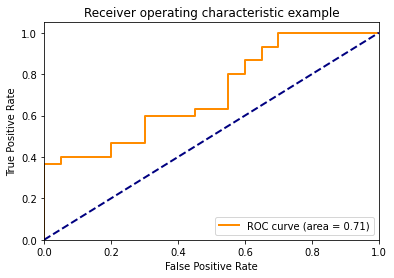

In [12]:
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Discussion**

Todo

**Precision & Recall**

Define:

Được dùng đối với các bài toán mà training set của classes chênh lệnh nhau lớn.
```
                 TP
Precision = --------------
              TP + FP

                 TP
Recall    = --------------
              TP + FN

```



**Binary classification**

**Visualize**

In [14]:
# generate simulated data
n0, n1 = 10, 50
score0 = np.random.rand(n0)/2
label0 = np.zeros(n0, dtype = int)
score1  = np.random.rand(n1)/2 + .3
label1 = np.ones(n1, dtype = int)
scores = np.concatenate((score0, score1))
y_true = np.concatenate((label0, label1))

print('True labels:')
print(y_true)
print('\nScores of points in class 0:')
print(scores[:n0])
print('\nScores of points in class 1:')
print(scores[n0:])

True labels:
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Scores of points in class 0:
[0.14988089 0.20466351 0.17411144 0.44452488 0.27587376 0.32583816
 0.10831469 0.14118166 0.34488126 0.48261442]

Scores of points in class 1:
[0.5167598  0.56054793 0.65020075 0.71641917 0.72779364 0.58172161
 0.5719462  0.51096973 0.51681152 0.65983004 0.65569911 0.64181318
 0.66470342 0.60987103 0.4330387  0.60723802 0.3632127  0.38177456
 0.36908715 0.70763308 0.68183483 0.61640847 0.47867491 0.66498809
 0.37559543 0.7224147  0.45982521 0.7864925  0.51498286 0.49314569
 0.4035684  0.42089244 0.72254149 0.47379523 0.76559637 0.68879107
 0.43262619 0.69451704 0.50482817 0.76650636 0.6865987  0.480103
 0.38106977 0.36754713 0.73282866 0.47611924 0.66363297 0.79932648
 0.58770029 0.64844914]


In [15]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_true,scores)

print('Average precision scores: {0:0.2f}'.format(average_precision))

Average precision scores: 0.99


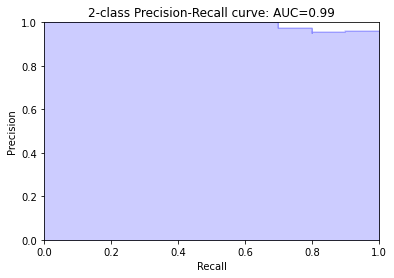

In [16]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thrs = precision_recall_curve(y_true, scores)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(average_precision))
plt.show()

**F1 - Score**

```
        Precision.Recall
F1 = 2---------------------
       Precision + Recall

```

General case:

```
                 Precision.Recall
F1 = (1 + b^2)----------------------
              b^2.Precision + Recall    



when: 

*   b > 1: Precision is importance - (thường chọn b = 2)
*   b < 1: Recall is importance    - (thường chọn b = 5)

```


**Precision - recall cho bài toán phân lớp nhiều lớp**

ValueError: ignored